In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [3]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [5]:
data=pd.DataFrame(data,columns=["Math","Bio"])

In [6]:
data

,Math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


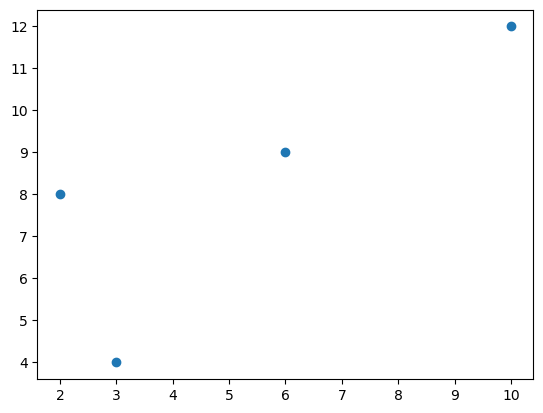

In [8]:
plt.scatter(data['Math'],data['Bio'])

In [9]:
meanbycol=np.mean(data,axis=0)

In [10]:
meanbycol

Math    5.25
Bio     8.25
dtype: float64

In [14]:
scaleddata=(data-meanbycol)/(np.std(data,axis=0))

In [15]:
scaleddata

,Math,Bio
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st=StandardScaler()

In [18]:
scaled=st.fit_transform(data)

In [19]:
scaled

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [22]:
cov_mat=np.cov(scaleddata.T)

In [24]:
eig_val=eig(cov_mat)

(array([2.40938985, 0.25727682]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA()

In [41]:
ab=pca.fit_transform(scaleddata)

In [42]:
df=pd.DataFrame(ab,columns=["PC1","PC2"])

In [44]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [45]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [46]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df.drop(columns=["Id number","Type of glass"],axis=1,inplace=True)

In [49]:
sc=StandardScaler()

In [50]:
scaleddata=sc.fit_transform(df)

In [58]:
pca1=PCA()

In [59]:
pcadata=pd.DataFrame(pca1.fit_transform(df))

In [60]:
pcadata

,0,1,2,3,4,5,6,7,8
0,-1.431425,-1.102115,-1.066958,-0.158237,0.143080,-0.081096,-0.067756,0.011377,-0.000945
1,-1.436707,0.343585,-0.277824,-0.293937,-0.194434,-0.050149,-0.043168,-0.017048,-0.000955
2,-1.427322,0.345720,0.138708,-0.321984,0.023720,-0.189375,-0.045462,0.019612,-0.000351
3,-1.257825,-0.249060,0.057742,0.022271,0.002472,0.016129,-0.046219,0.087868,-0.000471
4,-1.312466,-0.018405,0.357510,-0.278564,-0.071025,0.084925,-0.054818,-0.001803,-0.000694
...,...,...,...,...,...,...,...,...,...
209,2.273596,2.131266,-0.303368,0.213925,0.754221,-0.626941,-0.048555,-0.020373,0.000980
210,1.758894,2.890519,-0.579363,-0.514717,0.570620,0.380750,-0.017236,-0.010704,0.000534
211,1.778878,2.731333,0.028322,-0.515026,0.797331,0.414617,-0.026416,0.012678,-0.003712
212,1.795894,2.715168,0.148468,-0.660904,0.694372,0.447824,-0.029770,-0.024997,0.000401


In [61]:
max(pca1.explained_variance_ratio_)

0.4762052471305965

In [62]:
min(pca1.explained_variance_ratio_)

1.5391770150928924e-07

In [65]:
sum(sorted(pca1.explained_variance_ratio_,reverse=True)[0:6])

0.9983380497779837

In [66]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.47620525, 0.73939801, 0.84719844, 0.94922308, 0.98229031,
       0.99833805, 0.99976548, 0.99999985, 1.        ])

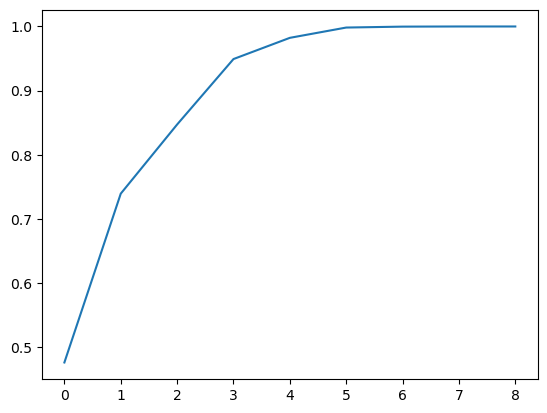

In [67]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))